# Modelos de regresión lineal
## Modelos con datos simulados
* $ y = a + bx $
* $ x $: 100 valores distribuídos según una $\mathcal{N}(1.5,2.5)$
* $y_e = 5 + 1.9x + \varepsilon$
* $\varepsilon$ estará distribuído según $\mathcal{N}(0,0.6)$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.normal(1.5,0.6,100)

In [3]:
res = np.random.normal(0,1.4,100)

In [4]:
y_pred = 5 + 1.9*x

In [5]:
y_act = 5 + 1.9*x + res

In [6]:
data = pd.DataFrame(
    {
        "x": x,
        "y": y_act,
        "y_pred": y_pred
    }
)
data.head()

,x,y,y_pred
0,1.868662,10.889369,8.550458
1,1.479542,9.239224,7.811129
2,0.729932,5.473957,6.386870
3,0.585211,5.581001,6.111901
4,1.185196,9.245073,7.251872


In [7]:
y_mean = [np.mean(y_act) for i in range(1, len(x) + 1)]

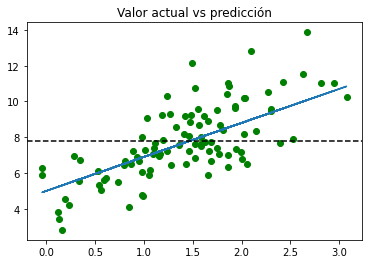

In [8]:
plt.plot(x,y_pred)
plt.scatter(x,y_act, color = "green")
plt.axhline(np.mean(y_act), color = "black", linestyle = "--")
plt.title("Valor actual vs predicción")
plt.show()

In [9]:
data["SSR"] = (data["y_pred"] - np.mean(y_act)) ** 2
data["SSD"] = (data["y_pred"] - data["y"]) ** 2
data["SST"] = (data["y"] - np.mean(y_act)) ** 2

SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

R2 = SSR/SST

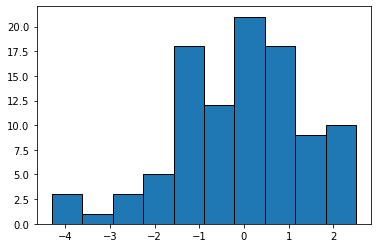

In [10]:
plt.hist(data["y_pred"] - data["y"], edgecolor = "black")
plt.show()

## Obteniendo la recta de regresión
Recordar que:
$ y = \beta_0 + \beta_1x$

In [11]:
x_mean = np.mean(x)
y_mean = np.mean(y_act)
x_mean, y_mean

(1.4065380910945375, 7.767350788633374)

In [12]:
beta_1 = data.cov()["x"]["y"]/data.var()["x"]
beta_0 = y_mean - beta_1 * x_mean
beta_0 , beta_1

(4.643391736682689, 2.2210269822978543)

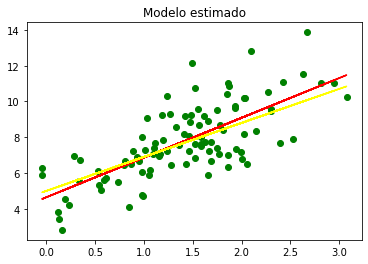

In [13]:
plt.scatter(x,y_act, color = "green")
plt.plot(x, beta_0 + x * beta_1, color = "red")
plt.plot(x,y_pred, color = "yellow")
plt.title("Modelo estimado")
plt.show()

In [14]:
data["y_model"] = beta_0 + beta_1 * data["x"]

In [15]:
data["SSR_M"] = (data["y_model"] - np.mean(y_act)) ** 2
data["SSD_M"] = (data["y_model"] - data["y"]) ** 2

SSR_M = sum(data["SSR_M"])
SSD_M = sum(data["SSD_M"])

R2_M = SSR_M/SST

R2, R2_M

(0.38957875641618417, 0.5294610566094137)

In [16]:
RSE = np.sqrt(SSD/(len(data)-2))

In [17]:
RSE / y_mean

0.18679936552857082